In [11]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'Water_Quality_Sampling_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now 'df' is a pandas DataFrame containing your CSV data
df.head

/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<bound method NDFrame.head of          DATA_REF_NO  DEPTH_IN_METERS FILTER  LAT_DD_WGS84  LON_DD_WGS84  \
0            2308323              NaN  Total     30.251205    -97.780891   
1            2308163              NaN  Total     30.251205    -97.780891   
2            2308160              NaN  Total     30.251205    -97.780891   
3            2308159              NaN  Total     30.251205    -97.780891   
4            2308158              NaN  Total     30.251205    -97.780891   
...              ...              ...    ...           ...           ...   
1447864      2637982              NaN  Total     29.893342    -97.931211   
1447865      2668372              NaN  Total     29.893719    -97.930514   
1447866      2668371              NaN  Total     29.893719    -97.930514   
1447867      2668373              NaN  Total     29.893719    -97.930514   
1447868      2668374              NaN  Total     29.893719    -97.930514   

               MEDIUM                   METHOD           

In [12]:
# Select columns to remove 
columns_to_remove = ['DATA_REF_NO', 'DEPTH_IN_METERS', 'FILTER', 'LAT_DD_WGS84', 'LON_DD_WGS84', 'MEDIUM', 'METHOD', 'PROJECT', 'TIME_NULL', 'SAMPLE_DATE', 'SAMPLE_ID',]

# Remove columns, so that now df contains only the columns that were not specified for removal
df = df.drop(columns=columns_to_remove)

In [13]:
# Make dataframe containing only rows where 'param_type' is 'Nutrients' or 'Bacteria'
nutrients_param_df = df[(df['PARAM_TYPE'] == 'Nutrients')]

ecoli_param_df = df[(df['PARAM_TYPE'] == 'Bacteria/Pathogens') & (df['PARAMETER'] == 'E COLI BACTERIA')]

In [18]:
#See unique values for 'Nutrients'
nutrients_param_df['PARAMETER'].unique()
nutrients_param_df['PARAMETER'].value_counts()

AMMONIA AS N                       25715
PHOSPHORUS AS P                    24311
NITRATE/NITRITE AS N               20517
ORTHOPHOSPHORUS AS P               20056
TOTAL KJELDAHL NITROGEN AS N       16014
NITRATE AS N                        9121
SULFUR                              2406
NITROGEN AS N                        509
SOLUBLE AMMONIA AS N                 408
AMMONIUM AS NH4                      362
NITRITE AS N                         360
ORGANIC NITROGEN                     135
AMMONIUM AS NH4-N                    129
PHOSPHATE AS PO4                     102
LABILE PHOSPHORUS                     80
REDUCTANT-SOLUBLE PHOSPHORUS          80
METAL-OXIDE ADSORBED PHOSPHORUS       80
ORGANIC PHOSPHORUS                    80
APATITE AND RESIDUAL PHOSPHORUS       80
NITROGEN:PHOSPHORUS MOLAR RATIO       50
CARBON:NITROGEN MOLAR RATIO           44
CARBON:PHOSPHORUS MOLAR RATIO         44
NITRATE AS NO3                        30
NITRITE AS NO2                        27
FREE REACTIVE PH

In [22]:
#Filter nutrients df to only include parameters 'AMMONIA AS N', 'PHOSPHORUS AS P', 'NITRATE/NITRITE AS N', 'ORTHOPHOSPHORUS AS P', 'SULFUR', 'TOTAL KJELDAHL NITROGEN AS N'
nutrients_df = nutrients_param_df[(nutrients_param_df['PARAMETER'] == 'AMMONIA AS N') | (nutrients_param_df['PARAMETER'] == 'PHOSPHORUS AS P') | (nutrients_param_df['PARAMETER'] == 'NITRATE/NITRITE AS N') | (nutrients_param_df['PARAMETER'] == 'ORTHOPHOSPHORUS AS P') | (nutrients_param_df['PARAMETER'] == 'SULFUR') | (nutrients_param_df['PARAMETER'] == 'TOTAL KJELDAHL NITROGEN AS N')]

In [44]:
# Merge the two DataFrames based on 'SAMPLE_REF_NO'
merged_df = pd.merge(ecoli_param_df, nutrients_df, on='SAMPLE_REF_NO', how='inner')

# Create new columns in merged_df for each unique value in 'PARAMETER' from 'nutrients_df'
unique_parameters = nutrients_df['PARAMETER'].unique()
for parameter in unique_parameters:
    merged_df[parameter] = merged_df.loc[merged_df['PARAMETER_y'] == parameter, 'RESULT_y']

# Create a new columns for E. coli count from ecoli_param_df
unique_parameters = ecoli_param_df['PARAMETER'].unique()
for parameter in unique_parameters:
    merged_df[parameter] = merged_df.loc[merged_df['PARAMETER_x'] == parameter, 'RESULT_x']

merged_df

,PARAM_TYPE_x,PARAMETER_x,QC_FLAG_x,QC_TYPE_x,QUALIFIER_x,RESULT_x,SAMPLE_REF_NO,SAMPLE_SITE_NO_x,SITE_NAME_x,SITE_TYPE_x,...,SITE_TYPE_y,UNIT_y,WATERSHED_y,AMMONIA AS N,NITRATE/NITRITE AS N,TOTAL KJELDAHL NITROGEN AS N,ORTHOPHOSPHORUS AS P,PHOSPHORUS AS P,SULFUR,E COLI BACTERIA
0,Bacteria/Pathogens,E COLI BACTERIA,J,NaN,NaN,5.0,229355,160,Backdoor Spring,Spring,...,Spring,MG/L,Barton Creek,0.02,NaN,NaN,NaN,NaN,NaN,5.0
1,Bacteria/Pathogens,E COLI BACTERIA,J,NaN,NaN,5.0,229355,160,Backdoor Spring,Spring,...,Spring,MG/L,Barton Creek,NaN,1.94,NaN,NaN,NaN,NaN,5.0
2,Bacteria/Pathogens,E COLI BACTERIA,J,NaN,NaN,5.0,229355,160,Backdoor Spring,Spring,...,Spring,MG/L,Barton Creek,NaN,NaN,NaN,0.02,NaN,NaN,5.0
3,Bacteria/Pathogens,E COLI BACTERIA,J,NaN,NaN,5.0,229355,160,Backdoor Spring,Spring,...,Spring,MG/L,Barton Creek,NaN,NaN,NaN,0.02,NaN,NaN,5.0
4,Bacteria/Pathogens,E COLI BACTERIA,?,NaN,CG,NaN,229416,428,Eliza Spring,Spring,...,Spring,MG/L,Barton Creek,0.02,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18698,Bacteria/Pathogens,E COLI BACTERIA,NaN,NaN,NaN,1.0,592943,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,...,Lake,MG/L,Walter E. Long Lake,NaN,NaN,NaN,0.01,NaN,NaN,1.0
18699,Bacteria/Pathogens,E COLI BACTERIA,NaN,NaN,NaN,1.0,592943,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,...,Lake,MG/L,Walter E. Long Lake,NaN,NaN,NaN,NaN,0.02,NaN,1.0
18700,Bacteria/Pathogens,E COLI BACTERIA,U,NaN,NaN,56.0,320656,4358,Blanco River @ Halifax Creek Dock,Stream,...,Stream,MG/L,Blanco River,0.012,NaN,NaN,NaN,NaN,NaN,56.0
18701,Bacteria/Pathogens,E COLI BACTERIA,U,NaN,NaN,56.0,320656,4358,Blanco River @ Halifax Creek Dock,Stream,...,Stream,MG/L,Blanco River,NaN,0.01,NaN,NaN,NaN,NaN,56.0


In [58]:
# COMBINE ROWS WITH SAME 'SAMPLE_REF_NO'
# Group by 'SAMPLE_REF_NO' and aggregate the values in columns 24-29
aggregated_df = merged_df.groupby('SAMPLE_REF_NO').agg({
    'AMMONIA AS N': 'sum',
    'NITRATE/NITRITE AS N': 'sum',
    'TOTAL KJELDAHL NITROGEN AS N': 'sum',
    'ORTHOPHOSPHORUS AS P': 'sum', 
    'PHOSPHORUS AS P': 'sum', 
    'SULFUR': 'sum', 
}).reset_index()
aggregated_df

# Merge the aggregated information back to the original DataFrame
merged_df1 = pd.merge(merged_df.drop(['AMMONIA AS N', 'NITRATE/NITRITE AS N', 'TOTAL KJELDAHL NITROGEN AS N', 'ORTHOPHOSPHORUS AS P', 'PHOSPHORUS AS P', 'SULFUR'], axis=1),
                     aggregated_df, on='SAMPLE_REF_NO', how='left')

# drop duplicate rows 
merged_df2 = merged_df1.drop_duplicates()
merged_df2

,PARAM_TYPE_x,PARAMETER_x,QC_FLAG_x,QC_TYPE_x,QUALIFIER_x,RESULT_x,SAMPLE_REF_NO,SAMPLE_SITE_NO_x,SITE_NAME_x,SITE_TYPE_x,...,SITE_TYPE_y,UNIT_y,WATERSHED_y,E COLI BACTERIA,AMMONIA AS N,NITRATE/NITRITE AS N,TOTAL KJELDAHL NITROGEN AS N,ORTHOPHOSPHORUS AS P,PHOSPHORUS AS P,SULFUR
0,Bacteria/Pathogens,E COLI BACTERIA,J,NaN,NaN,5.0,229355,160,Backdoor Spring,Spring,...,Spring,MG/L,Barton Creek,5.0,0.02,1.94,0,0.04,0,0
1,Bacteria/Pathogens,E COLI BACTERIA,J,NaN,NaN,5.0,229355,160,Backdoor Spring,Spring,...,Spring,MG/L,Barton Creek,5.0,0.02,1.94,0,0.04,0,0
2,Bacteria/Pathogens,E COLI BACTERIA,J,NaN,NaN,5.0,229355,160,Backdoor Spring,Spring,...,Spring,MG/L,Barton Creek,5.0,0.02,1.94,0,0.04,0,0
4,Bacteria/Pathogens,E COLI BACTERIA,?,NaN,CG,NaN,229416,428,Eliza Spring,Spring,...,Spring,MG/L,Barton Creek,NaN,0.02,1.42,0,0.04,0,0
5,Bacteria/Pathogens,E COLI BACTERIA,?,NaN,CG,NaN,229416,428,Eliza Spring,Spring,...,Spring,MG/L,Barton Creek,NaN,0.02,1.42,0,0.04,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18698,Bacteria/Pathogens,E COLI BACTERIA,NaN,NaN,NaN,1.0,592943,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,...,Lake,MG/L,Walter E. Long Lake,1.0,0.02,0.02,1.02,0.01,0.02,0
18699,Bacteria/Pathogens,E COLI BACTERIA,NaN,NaN,NaN,1.0,592943,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,...,Lake,MG/L,Walter E. Long Lake,1.0,0.02,0.02,1.02,0.01,0.02,0
18700,Bacteria/Pathogens,E COLI BACTERIA,U,NaN,NaN,56.0,320656,4358,Blanco River @ Halifax Creek Dock,Stream,...,Stream,MG/L,Blanco River,56.0,0.012,0.01,0,0.002,0,0
18701,Bacteria/Pathogens,E COLI BACTERIA,U,NaN,NaN,56.0,320656,4358,Blanco River @ Halifax Creek Dock,Stream,...,Stream,MG/L,Blanco River,56.0,0.012,0.01,0,0.002,0,0


In [70]:
# DATA CLEANING 
merged_df1.columns.tolist()
# Drop unnecessary columns from the merged DataFrame
merged_df1 = merged_df1.drop(['PARAM_TYPE_x', 'PARAMETER_x', 'RESULT_x', 'SAMPLE_SITE_NO_y', 'SITE_NAME_y', 'SITE_TYPE_y', 'WATERSHED_y'], axis=1)

['QC_FLAG_x',
 'QC_TYPE_x',
 'QUALIFIER_x',
 'SAMPLE_REF_NO',
 'SAMPLE_SITE_NO_x',
 'SITE_NAME_x',
 'SITE_TYPE_x',
 'UNIT_x',
 'WATERSHED_x',
 'QC_FLAG_y',
 'QC_TYPE_y',
 'QUALIFIER_y',
 'UNIT_y',
 'E COLI BACTERIA',
 'AMMONIA AS N',
 'NITRATE/NITRITE AS N',
 'TOTAL KJELDAHL NITROGEN AS N',
 'ORTHOPHOSPHORUS AS P',
 'PHOSPHORUS AS P',
 'SULFUR']

In [73]:
#STILL CLEANING
# Drop unnecessary columns from the merged DataFrame
merged_df1 = merged_df1.drop(['QC_FLAG_x', 'QC_TYPE_x', 'QUALIFIER_x', 'QC_FLAG_y', 'QC_TYPE_y', 'QUALIFIER_y'], axis=1)

# Rename columns for clarity
merged_df1 = merged_df1.rename(columns={'SAMPLE_SITE_NO_x': 'SAMPLE_SITE_NO', 'SITE_NAME_x': 'SITE_NAME',
 'SITE_TYPE_x': 'SITE_TYPE',
 'UNIT_x': 'UNIT_ECOLI',
 'WATERSHED_x': 'WATERSHED', 'UNIT_y': 'UNIT_NUTRIENT'})


In [88]:
merged_df2 = merged_df1.drop_duplicates()
merged_df2


,SAMPLE_REF_NO,SAMPLE_SITE_NO,SITE_NAME,SITE_TYPE,UNIT_ECOLI,WATERSHED,UNIT_NUTRIENT,E COLI BACTERIA,AMMONIA AS N,NITRATE/NITRITE AS N,TOTAL KJELDAHL NITROGEN AS N,ORTHOPHOSPHORUS AS P,PHOSPHORUS AS P,SULFUR
0,229355,160,Backdoor Spring,Spring,Colonies/100mL,Barton Creek,MG/L,5.0,0.02,1.94,0,0.04,0,0
4,229416,428,Eliza Spring,Spring,Colonies/100mL,Barton Creek,MG/L,NaN,0.02,1.42,0,0.04,0,0
8,229354,35,Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,10.0,0.02,1.5,0,0.04,0,0
12,229372,183,Upper Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,88.0,0.02,2.43,0,0.04,0,0
16,229413,183,Upper Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,420.0,0.02,2.36,0,0.04,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18680,591406,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,MPN/100ML,Walter E. Long Lake,MG/L,17.3,0.0448,0.512,0.89,0.052,0.251,0
18685,592939,4345,Lake Long mid-lake of Eastern Arm (LWL4),Lake,MPN/100ML,Walter E. Long Lake,MG/L,1.0,0.02,0.02,0.99,0.01,0.038,0
18690,592941,4344,Lake Long @ Dam (LWL3),Lake,MPN/100ML,Walter E. Long Lake,MG/L,2.0,0.02,0.02,0.92,0.01,0.047,0
18695,592943,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,MPN/100ML,Walter E. Long Lake,MG/L,1.0,0.02,0.02,1.02,0.01,0.02,0


In [91]:
import numpy as np
merged_df3 = merged_df2
# Replace '0' with NaN (missing value) because zeros replaced 'NaN' when rows with the same 'SAMPLE_REF_NO' were combined
columns_to_replace = ['AMMONIA AS N', 'NITRATE/NITRITE AS N', 'TOTAL KJELDAHL NITROGEN AS N', 'ORTHOPHOSPHORUS AS P', 'PHOSPHORUS AS P', 'SULFUR']
merged_df3[columns_to_replace] = merged_df3[columns_to_replace].replace(0, np.nan)

merged_df2

/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,SAMPLE_REF_NO,SAMPLE_SITE_NO,SITE_NAME,SITE_TYPE,UNIT_ECOLI,WATERSHED,UNIT_NUTRIENT,E COLI BACTERIA,AMMONIA AS N,NITRATE/NITRITE AS N,TOTAL KJELDAHL NITROGEN AS N,ORTHOPHOSPHORUS AS P,PHOSPHORUS AS P,SULFUR
0,229355,160,Backdoor Spring,Spring,Colonies/100mL,Barton Creek,MG/L,5.0,0.02,1.94,NaN,0.04,NaN,NaN
4,229416,428,Eliza Spring,Spring,Colonies/100mL,Barton Creek,MG/L,NaN,0.02,1.42,NaN,0.04,NaN,NaN
8,229354,35,Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,10.0,0.02,1.5,NaN,0.04,NaN,NaN
12,229372,183,Upper Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,88.0,0.02,2.43,NaN,0.04,NaN,NaN
16,229413,183,Upper Barton Spring,Spring,Colonies/100mL,Barton Creek,MG/L,420.0,0.02,2.36,NaN,0.04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18680,591406,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,MPN/100ML,Walter E. Long Lake,MG/L,17.3,0.0448,0.512,0.89,0.052,0.251,NaN
18685,592939,4345,Lake Long mid-lake of Eastern Arm (LWL4),Lake,MPN/100ML,Walter E. Long Lake,MG/L,1.0,0.02,0.02,0.99,0.01,0.038,NaN
18690,592941,4344,Lake Long @ Dam (LWL3),Lake,MPN/100ML,Walter E. Long Lake,MG/L,2.0,0.02,0.02,0.92,0.01,0.047,NaN
18695,592943,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,MPN/100ML,Walter E. Long Lake,MG/L,1.0,0.02,0.02,1.02,0.01,0.02,NaN


In [97]:
merged_df3.to_csv('waterdata_ecoli_nutrients.csv', index=False)

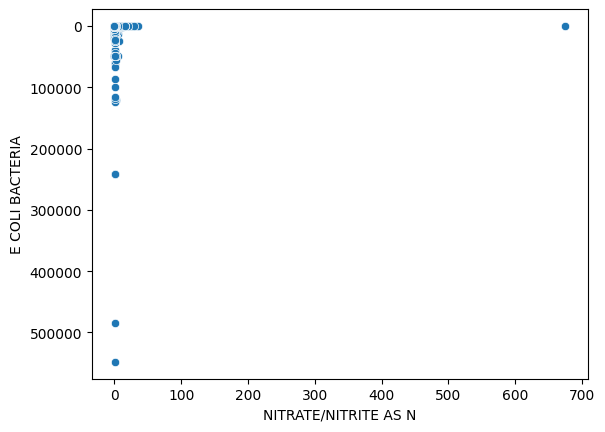